In [1]:
import numpy.matlib
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn import model_selection
from sklearn import utils
import pandas as pd
from joblib import Parallel, delayed
import scipy.io
import mne.stats as mstats
import scipy.stats as st
from scipy.stats import spearmanr

In [2]:
DataPath = 'Results/' 

fname='Results_diss_babies_pooled_decode_within_SVM_02.28.2024_16.29.56.mat'

data = loadmat(DataPath+fname)['results'][0,0]
DA = data['DA']
times=data['times']
np.shape(DA)

(15, 1100, 16, 16)

In [3]:
time_start = 0  
time_end = 1100  

# By participant

accMeansD = []


for part in range(0,np.shape(DA)[0]):
    
   
    
    accTimesD = []

    for point in range(time_start,time_end):
        
        
        TimeMean = np.nanmean(np.ndarray.flatten(DA[part,point,:,:]))
        
        
        accTimesD.append(TimeMean)
     
    accMeansD.append(accTimesD)


# Average

accAllMeansD = []


for point in range(time_start,time_end):


    TimeMean = np.nanmean(np.ndarray.flatten(DA[:,point,:,:]))
   
    accAllMeansD.append(TimeMean)

    

# All standard dev


pstdAllD = []

for point in range(time_start,time_end):  



    accTimesD = []

    
    for part in range(0,np.shape(DA)[0]):
        
    
        TimeMean = np.nanmean(np.ndarray.flatten(DA[part,point,:,:]))
          
        accTimesD.append(TimeMean)

    
    pstdAllD.append(np.nanstd(accTimesD))
  

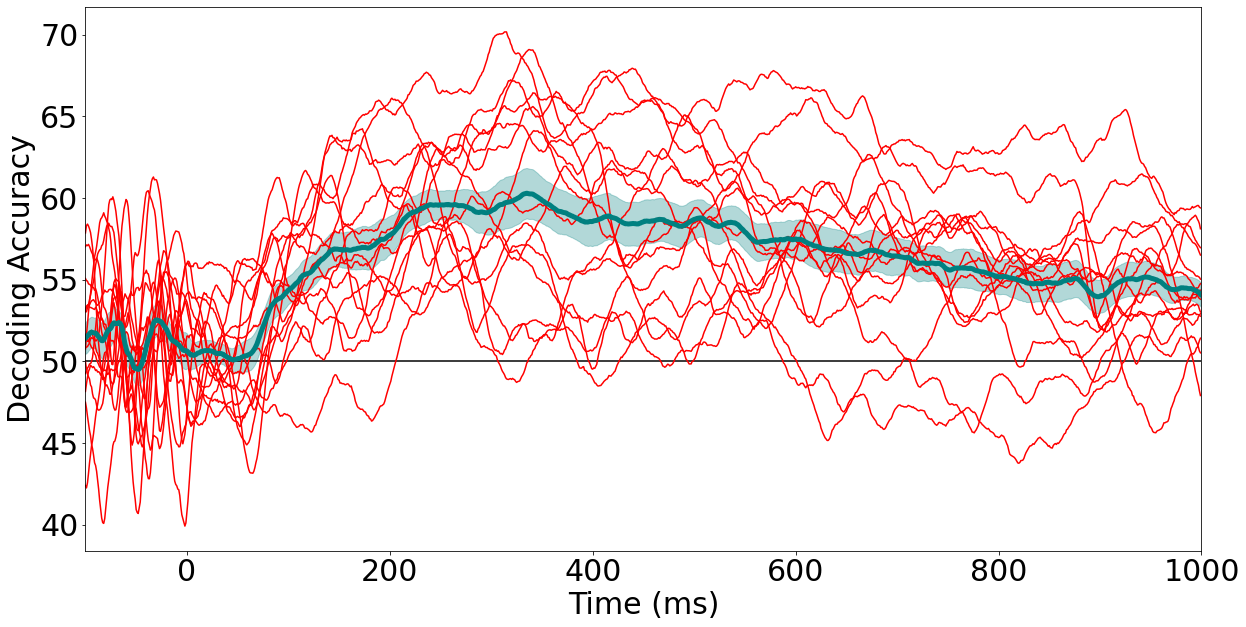

In [4]:
################ PLOT 

plt.figure(figsize=(20,10))  

for i in range(0,np.shape(DA)[0]):
    plt.plot(range(time_start-100,time_end-100),accMeansD[i],color="red")
    
    
# # # All     
errorin=pstdAllD/np.sqrt(np.shape(DA)[0])

plt.fill_between(range(time_start-100,time_end-100), accAllMeansD-errorin,accAllMeansD+errorin, alpha=0.3, color="teal")

plt.plot(range(time_start-100,time_end-100),accAllMeansD, linewidth=5,color="teal", label="")

plt.title('',fontsize=30)
plt.ylabel('Decoding Accuracy',fontsize=30)   
plt.xlabel('Time (ms)',fontsize=30)

#plt.ylim(40, 90)
plt.xlim(-100,1000)
plt.hlines(50, -100, 1000)
plt.tick_params(axis='x', labelsize=30)  
plt.tick_params(axis='y', labelsize=30)  

plt.show()


In [ ]:
# Cluster corrected significance 

In [8]:
time_start = 0  # 0
time_end = 1100    # 500
b = np.full([np.shape(DA)[0],1100],50)
size=np.shape(DA)[0]

iAllClusterData = np.empty([size,1100])


for part in range(0,size):
 
    for point in range(time_start,time_end):
        
        PyTimeMean = np.nanmean(np.ndarray.flatten(DA[part,point,:,:]))
       
        iAllClusterData[part,point]=PyTimeMean

iallT_obs, iallclusters, iallcluster_p_values, iallH0 = mstats.permutation_cluster_test([iAllClusterData,b], tail=1, out_type="mask")


Using a threshold of 4.195972
stat_fun(H1): min=0.000670 max=111.540507
Running initial clustering
Found 3 clusters
Permuting 1023 times...
[............................................................] 100.00%  |
Computing cluster p-values
Done.


No handles with labels found to put in legend.


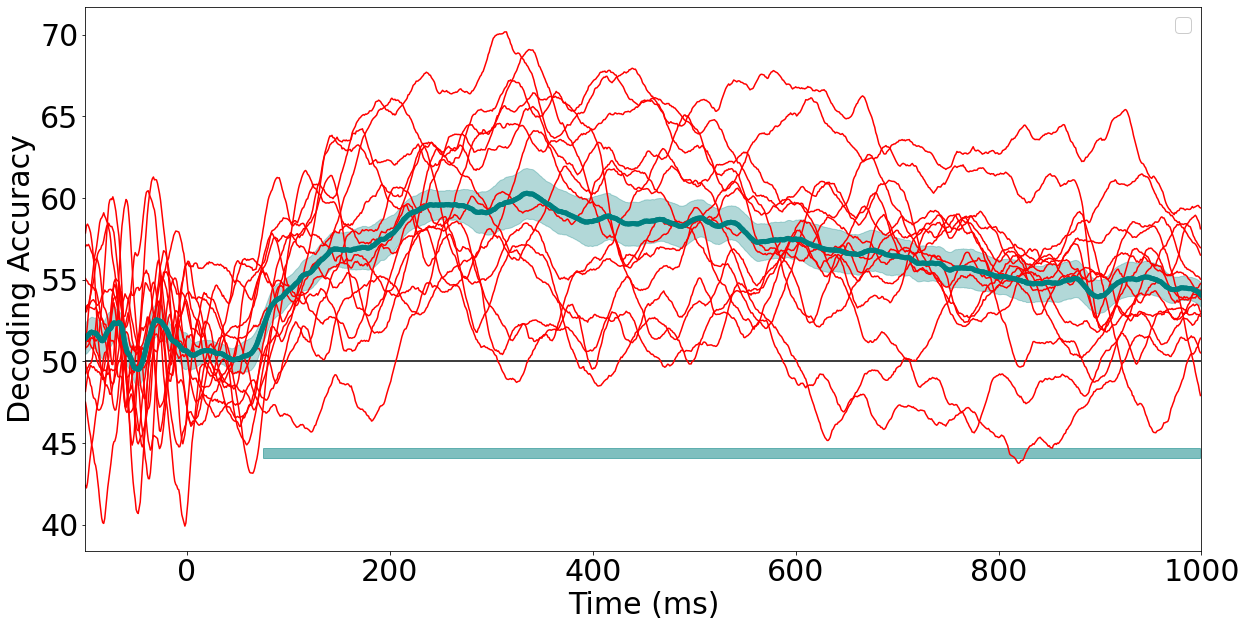

In [11]:
times=range(0,1100)

plt.figure(figsize=(20,10))  
  
for i in range(0,np.shape(DA)[0]):
    plt.plot(range(time_start-100,time_end-100),accMeansD[i],color="red")
    
    
# # # All     
errorin=pstdAllD/np.sqrt(np.shape(DA)[0])

plt.fill_between(range(time_start-100,time_end-100), accAllMeansD-errorin,accAllMeansD+errorin, alpha=0.3, color="teal")

plt.plot(range(time_start-100,time_end-100),accAllMeansD, linewidth=5,color="teal", label="")

#plt.fill_between(range(time_start-50,time_end-50), accAllMeansD-errorin,accAllMeansD+errorin, alpha=0.3, color="teal")

plt.plot(range(time_start-100,time_end-100),accAllMeansD, linewidth=5,color="teal", label="")
#plt.plot(range(time_start-100,time_end-100),np.nanmean(iAcrossClusterData,0), linewidth=5,color="purple", label="Across")    
#plt.plot(range(time_start-100,time_end-100),np.nanmean(iWithinClusterData,0), linewidth=5,color="black", label="Within")    



plt.subplot
for i_c, c in enumerate(iallclusters):
    c = c[0]

    if iallcluster_p_values[i_c] <= 0.05:
        h = plt.axvspan(times[c.start]-100, times[c.stop - 1]-100, 
                        color='teal', alpha=0.5,ymin=0.17,ymax=0.19)
        

# plt.subplot
# for i_c, c in enumerate(iaccclusters):
#     c = c[0]

#     if iacccluster_p_values[i_c] <= 0.05:
#         h = plt.axvspan(times[c.start]-100, times[c.stop - 1]-100, 
#                         color='purple', alpha=0.5,ymin=0.19,ymax=0.21)     
        
        
# plt.subplot
# for i_c, c in enumerate(iwithclusters):
#     c = c[0]

#     if iwithcluster_p_values[i_c] <= 0.05:
#         h = plt.axvspan(times[c.start]-100, times[c.stop - 1]-100, 
#                         color='black', alpha=0.5,ymin=0.21,ymax=0.23) 

# for i_c, c in enumerate(icompclusters):
#     c = c[0]
#     if icompcluster_p_values[i_c] <= 0.05:
#         print(icompcluster_p_values[i_c])
#         h = plt.axvspan(times[c.start]-100, times[c.stop - 1]-100, 
#                         color='pink', alpha=0.5,ymin=0.23,ymax=0.25) 



plt.title('',fontsize=30)
plt.ylabel('Decoding Accuracy',fontsize=30)   
plt.xlabel('Time (ms)',fontsize=30)
plt.hlines(50, -100, 1000)
#plt.ylim(40, 90)
plt.xlim(-100,1000)

plt.tick_params(axis='x', labelsize=30)  
plt.tick_params(axis='y', labelsize=30)  

plt.legend(framealpha=1, frameon=True, fontsize=20,loc="upper right")

plt.show()
#plt.savefig("Figures/adult_inf_comp.jpg")